# LLC Velocities

In [1]:
%matplotlib inline

In [2]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load Main table

In [4]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_uniform_r0.5_test.feather


In [5]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

In [6]:
llc_table.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,...,pp_idx,pp_type,LL,U_mean,V_mean,U_rms,V_rms,UV_mean,UV_rms,DT
0,71.725098,-177.172684,12895,10607,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.467546,...,647491,0,648.981934,-0.099179,-0.001986,0.059771,0.063255,0.141285,0.082805,0.190000
1,71.747978,-175.380554,12895,10676,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-0.492408,...,384768,0,-513.771851,-0.008606,-0.042140,0.041484,0.108360,0.046431,0.037870,4.904001
2,71.758400,-173.559555,12895,10746,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,3.271719,...,283882,0,345.448669,0.070156,-0.045817,0.022577,0.044823,0.099820,0.029986,0.958000
3,71.755905,-171.737854,12895,10816,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.945127,...,613023,0,169.709839,0.081717,-0.010355,0.024675,0.039160,0.115622,0.034708,1.146000
4,71.740822,-169.943695,12895,10885,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.364319,...,537161,0,349.981262,0.039346,0.019852,0.023803,0.031211,0.057416,0.030541,0.950000


# Pick an outlier

In [1]:
high_DT = llc_table.DT > 4.
i4000 = np.argmin(np.abs(llc_table[high_DT].LL + 4000.))
cutout = llc_table[high_DT].iloc[i4000]
cutout

NameError: name 'llc_table' is not defined

## Show

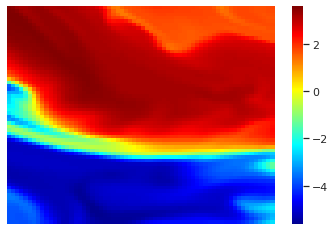

In [8]:
img, pp_hf = llc_io.grab_image(cutout, close=False)
pal, cm = plotting.load_palette()
ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

# Load velocities

In [13]:
with ulmo_io.open(cutout.LLC_file, 'rb') as f:
    ds = xarray.open_dataset(f)
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

In [16]:
U = ds.U[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
V = ds.V[cutout.row:cutout.row+64, cutout.col:cutout.col+64]

<AxesSubplot:>

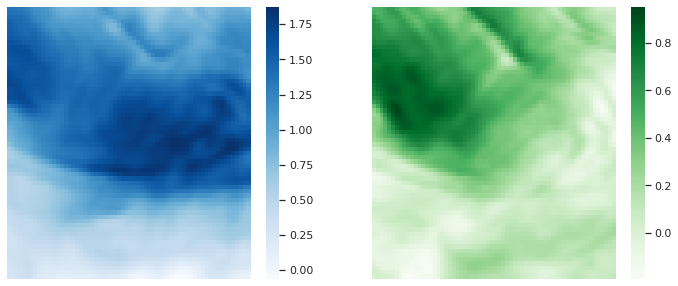

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
cmB = plt.get_cmap('Blues')
cmG = plt.get_cmap('Greens')

#
sns.heatmap(U, xticklabels=[], yticklabels=[], cmap=cmB,
             cbar=True, ax=ax1)
sns.heatmap(V, xticklabels=[], yticklabels=[], cmap=cmG,
             cbar=True, ax=ax2)

## And the magnitude of the field

In [32]:
tmp =  V**2
tmp.shape

(64, 64)

In [34]:
UV = np.sqrt(U.values**2 + V.values**2)

In [35]:
UV.shape

(64, 64)

<AxesSubplot:>

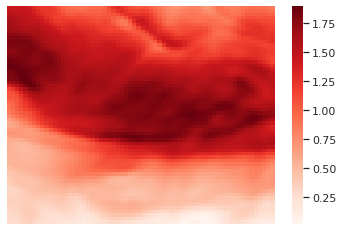

In [36]:
cmR = plt.get_cmap('Reds')

#
sns.heatmap(UV, xticklabels=[], yticklabels=[], cmap=cmR,
             cbar=True)

## Stats

In [45]:
mean_UV = np.mean(UV)
std_UV = np.std(UV)
mean_UV, std_UV

(1.1530513, 0.50446093)

## $W$

In [50]:
W = ds.W[0,cutout.row:cutout.row+64, cutout.col:cutout.col+64]
W.shape

(64, 64)

<AxesSubplot:>

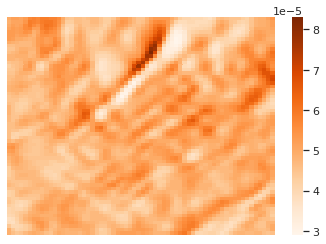

In [51]:
cmO = plt.get_cmap('Oranges')

#
sns.heatmap(W, xticklabels=[], yticklabels=[], cmap=cmO,
             cbar=True)

# Now a boring one

In [37]:
low_DT = llc_table.DT < 2.
i_HL = np.argmin(np.abs(llc_table[low_DT].LL - 1000.))
cutout_HL = llc_table[low_DT].iloc[i_HL]
cutout_HL

lat                                                          -7.47858
lon                                                           -138.51
row                                                              7499
col                                                             12423
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                               25.846
Tmin                                                           25.651
Tmax                                                           25.958
T90                                                            25.924
T10                                                            25.776
pp_idx              

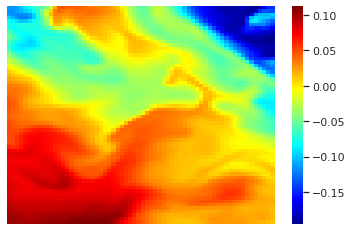

In [38]:
img_HL, pp_hf = llc_io.grab_image(cutout_HL, close=False, pp_hf=pp_hf)
ax = sns.heatmap(img_HL, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Velocities

In [39]:
with ulmo_io.open(cutout_HL.LLC_file, 'rb') as f:
    ds_HL = xarray.open_dataset(f)
ds_HL

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

In [40]:
U_HL = ds_HL.U[cutout_HL.row:cutout_HL.row+64, cutout_HL.col:cutout_HL.col+64]
V_HL = ds_HL.V[cutout_HL.row:cutout_HL.row+64, cutout_HL.col:cutout_HL.col+64]

<AxesSubplot:>

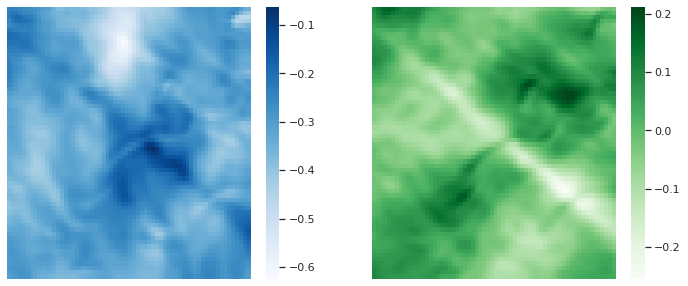

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
#
sns.heatmap(U_HL, xticklabels=[], yticklabels=[], cmap=cmB,
             cbar=True, ax=ax1)
sns.heatmap(V_HL, xticklabels=[], yticklabels=[], cmap=cmG,
             cbar=True, ax=ax2)

In [43]:
UV_HL = np.sqrt(U_HL.values**2 + V_HL.values**2)

<AxesSubplot:>

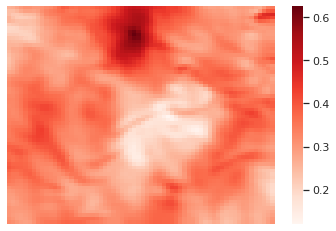

In [44]:
#
sns.heatmap(UV_HL, xticklabels=[], yticklabels=[], cmap=cmR,
             cbar=True)

In [46]:
mean_UV_HL = np.mean(UV_HL)
std_UV_HL = np.std(UV_HL)
mean_UV_HL, std_UV_HL

(0.32433677, 0.06965933)

# Scatter me

## Average velocity (sort of)

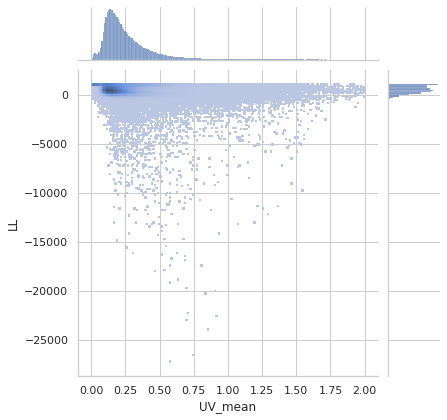

In [9]:
jg = sns.jointplot(data=llc_table[llc_table.UV_mean < 2.], x='UV_mean', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))

## RMS velocity

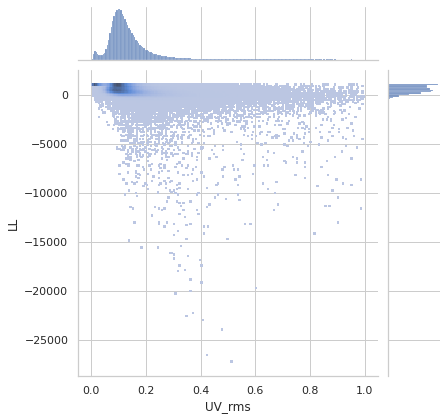

In [10]:
jg2 = sns.jointplot(data=llc_table[llc_table.UV_rms < 1.], x='UV_rms', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))

----

In [53]:
llc_table.field_size[0]

64